In [494]:
#!pip install tensorflow

In [ ]:
# import tensorflow as tf
# ! pip install Pillow
from PIL import Image
from IPython.display import display


Ouvrir l'image et afficher sa taille d'origine

In [496]:
def red_png(path, factor=0.3, yes=0):
    '''This function to display a reduce image.png
    Args:
        path : directory/image.png
        factor : the reduction factor
        yes : set to 0 by default, if put to 1 it means that the size before and after will be displayed
    '''
    img = Image.open(path)
    if yes:
        print("Taille d'origine :", img.size)

    # Redimensionner l'image à 50% de sa taille d'origine
    new_size = (int(img.width * factor), int(img.height * factor))
    img_resized = img.resize(new_size)

    # Afficher la nouvelle taille de l'image
    if yes:
        print("Nouvelle taille :", img_resized.size)

    # Afficher l'image redimensionnée dans le notebook
    display(img_resized)
    print("Source: DeepLearningIASD.pdf Tristan Cazenave PSL Dauphine")

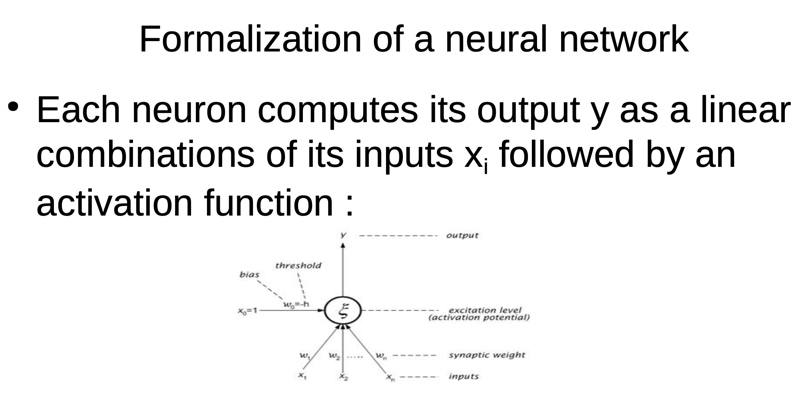

Source: DeepLearningIASD.pdf Tristan Cazenave PSL Dauphine


In [497]:
red_png(r'./png/NN_presentation.png', factor=.4)

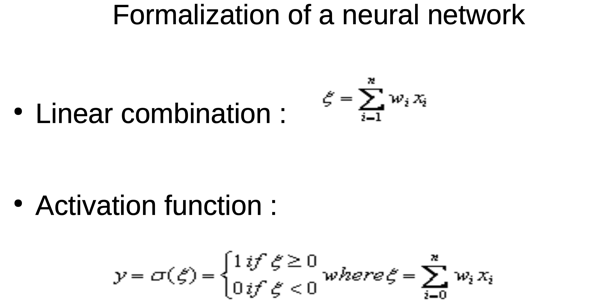

Source: DeepLearningIASD.pdf Tristan Cazenave PSL Dauphine


In [498]:
red_png(r'./png/NN_linear.png')

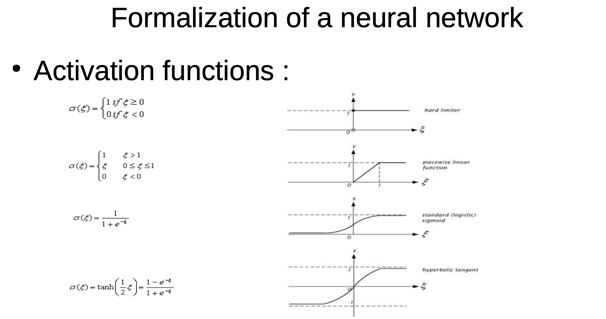

Source: DeepLearningIASD.pdf Tristan Cazenave PSL Dauphine


In [499]:
red_png(r'./png/NN_activation.png')

# Optimisation

Each layer of the first layer transforms the inputs (data) such as:

$output = relu(dot(W,input) + b$

The tensors $W$ and $b$ are the attributes of the layer. They are called the **weights** or trainable parameters.  
They are respectively named the attributs $kernel$ and $bias$.  
These weights contain all the information learned by the network thanks to the exposition to the training data.

### The steps  
- The random initialisation: the initial $weights$ contain small values chosen randomly. Of course the results are unlikely to be satisfying, it is just a starting point.  
- The training loop: the weights are adjusted progressively in function of the return signal:
1. Randomly select a batch (_lot_) of training examples x and their associated labels y  
2. launch the execution on the lot x (this step is called the **forward pass**) to obtain the predictions $y_pred$  
3. Compute the loss of the network on the batch, i.e. mesure the shift between $y$ and $y_pred$  
4. Update all the weights of the network in order to reduce slightly (_légèrement_) the loss over the batch

By the end of the process, the network will have a low loss on the training data set, i.e. a low shift between the predictions $y_pred$ and the expected labels $y$.  
The network has learnt how to associate the inputs data to the correct targeted labels.

Of course, for a network (sometimes contains millions, billions of weights) the method to update the weights will be done globally.  

All the operations used in the network are **differentiable** (have a derivative), we will thus compute the **Gradient to the loss** with respect to the coefficients of the network (_par rapport aux coefficients du réseau_).

We will then, move the coefficients in the opposit direction to the one of the gradient, thus reducing the loss.

# Backpropagation (_rétropropagation_)

## Example on the Perceptron to understand the backpropagation

Neural network with:
- two inputs $(i_1, i_2)$,
- two outputs $(o_1, o_2)$ and 
- two hidden layers $(h_1, h_2)$ 

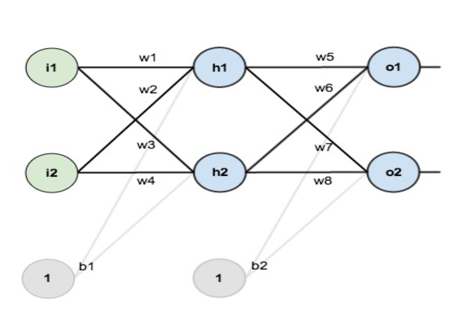

Source: DeepLearningIASD.pdf Tristan Cazenave PSL Dauphine


In [500]:
red_png(r'./png/Perceptron.png', factor=.4)

In this image, you have an "input" layer, an hidden layer and an output layer.

Objective
- Write a code for the random initialisation
- Write a code for the forward pass.
- Compute the mean square error
- Backpropagate the error
- Train the network

In [501]:
import math

# The inputs
i1 = .05
i2 = .10

# The outputs (targets)
o1 = .01
o2 = .99

# Initialisation of the input weights in the first layer
w1 = .15
w2 = .20
w3 = .25
w4 = .30
# Initialisation of the constant in the first layer
b1 = .35

# Initialisation des poids de sortie de la 1ère couche cachée
w5 = .40
w6 = .45
w7 = .50
w8 = .55
b2 = .60

In [502]:
# Cibles de nos deux sorties du réseau de neurones
target_o1 = 0.01
target_o2 = 0.99

In [503]:
# Définition de la fonction d'activation (sigmoïde)
import numpy as np
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

In [504]:
sigmoid(0)

0.5

# The Forward Pass

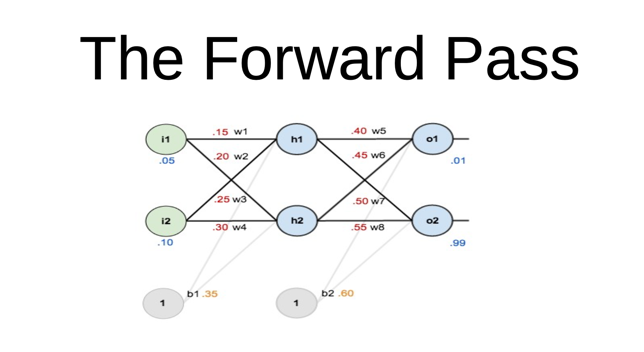

Source: DeepLearningIASD.pdf Tristan Cazenave PSL Dauphine


In [505]:
red_png(r'./png/NN_Fwd_Pass.png', factor=.4)

The steps of the forward pass

1. Apply the weights on the inputs:  

    $net_{h1} = i_1.w_1 + i_2.w_2 + b_1$  
    $net_{h2} = i_1.w_3 + i_2.w_4 + b_1$

2. Apply the activation function on these first outputs:  

    $out_{h1} = sigmoid(net_{h1})$  
    $out_{h2} = sigmoid(net_{h2})$  
    
3. Apply the weights on the inputs:  

    $net_{o1} = out_{h1}.w_5 + out_{h2}.w_6 + b_2$  
    $net_{o2} = out_{h1}.w_7 + out_{h2}.w_8 + b_2$  
    
4. Apply the activation function on these second outputs:  

    $out_{o1} = sigmoid(net_{o1})$  
    $out_{o2} = sigmoid(net_{o2})$    

The transformation steps:  

$i_1,i_2 \overset{\sum w_{1,\ldots,4} + b_1} \longrightarrow net_{h1},net_{h2} \overset{\sigma} \longrightarrow out_{h1},out_{h2} \overset{\sum w_{5,\ldots,8} + b_2} \longrightarrow net_{h1},net_{h2} \overset{\sigma} \longrightarrow out_{h1} $

In [506]:
# Forward pass with sigmoid as activation fonction

def fwd_pass(i1,i2,w1,w2,w3,w4,w5,w6,w7,w8,b1,b2):
    
    net_h1 = i1*w1 + i2*w2 + b1*1 
    net_h2 = i1*w3 + i2*w4 + b1*1

    out_h1 = sigmoid(net_h1) 
    out_h2 = sigmoid(net_h2)
    
    net_o1 = out_h1*w5 + out_h2*w6 + b2*1
    net_o2 = out_h1*w7 + out_h2*w8 + b2*1

    out_o1 = sigmoid(net_o1)   
    out_o2 = sigmoid(net_o2)
    
    return net_h1, net_h2, out_h1, out_h2, net_o1, net_o2, out_o1, out_o2

In [507]:
net_h1, net_h2, out_h1, out_h2, net_o1, net_o2, out_o1, out_o2 = fwd_pass(i1,i2,w1,w2,w3,w4,w5,w6,w7,w8,b1,b2)

In [508]:
net_h1, out_h1, net_h2, out_h2

(0.3775, 0.5932699921071872, 0.39249999999999996, 0.596884378259767)

In [509]:
net_o1, out_o1, net_o2, out_o2

(1.10590596705977, 0.7513650695523157, 1.2249214040964653, 0.7729284653214625)

# The Error

In [510]:
# Calcul de l'erreur quadratique moyenne (fonction)

def err_mse(x,y):
    err = 0.5*(x-y)**2
    return err

Error after the forward pass, with the initial weights

In [511]:
err_o1 = err_mse(out_o1, target_o1)
err_o2 = err_mse(out_o2, target_o2)
print(err_o1, err_o2)

# Erreur totale
err_tot = err_o1 + err_o2
err_tot

0.274811083176155 0.023560025583847746


0.2983711087600027

# The Backward Pass

## The Output layer

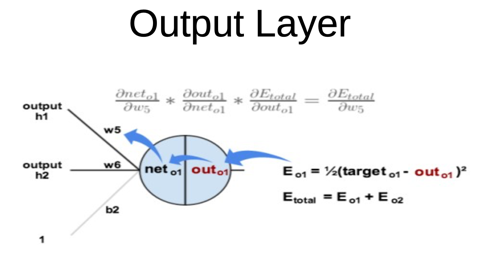

Source: DeepLearningIASD.pdf Tristan Cazenave PSL Dauphine


In [512]:
red_png(r'./png/NN_OutputLayer.png', factor=.3)

Consider $ w_5 $

$ \frac{\partial E_{total}}{\partial w5} $ ?

i.e., how much a change in $w_5$ affects the total error ?  

$ \frac{\partial E_{total}}{\partial w5} $ is read as "the partial derivative of $E_{total}$ with respect to $w_5$.

You can also say "the gradient with respect to $w_5$."

Reminder:  

$i_1,i_2 \overset{\sum w_{1,\ldots,4} + b_1} \longrightarrow net_{h1},net_{h2} \overset{\sigma} \longrightarrow out_{h1},out_{h2} \overset{\sum w_{5,\ldots,8} + b_2} \longrightarrow net_{h1},net_{h2} \overset{\sigma} \longrightarrow out_{h1} $

$E_{total} = E_{o1} + E_{o2} = \frac{1}{2} (target_{o1} - out_{o1})^2 + \frac{1}{2} (target_{o2} - out_{o2})^2$

By applying the chain rule we have:

$ \frac{\partial E_{total}}{\partial w_5} = \frac{\partial E_{total}}{\partial out_{o1}} * \frac{\partial out_{o1}}{\partial net_{o1}} * \frac{\partial net_{o1}}{\partial w_5} $  

We went back in time. We split the partial derivative $ \frac{\partial E_{total}}{\partial w_5}$ in a product of partial derivatives from back to the beginning (backward)

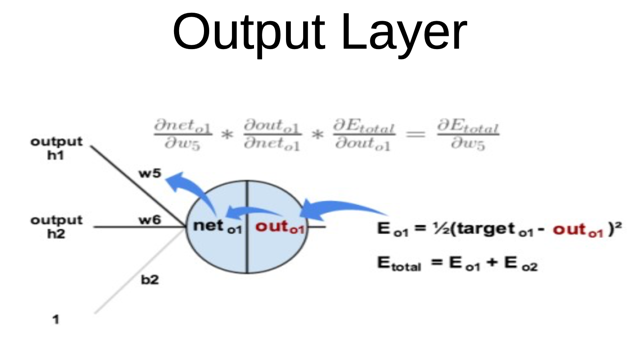

Source: DeepLearningIASD.pdf Tristan Cazenave PSL Dauphine


In [513]:
red_png(r'./png/NN_OutputLayer.png', factor=.4)

$ \frac{\partial E_{total}}{\partial out_{o1}} = \frac{1}{2}.2(-1)(target_{o1} - out_{o1}) + 0 = -(target_{o1} - out_{o1})$

$out_{o1} = \frac{1}{1 + \exp(-net_{o1})} = (1 + \exp(-net_{o1}))^{-1}$

Knowing that:  $(u^n)^{'} = nu^{'}u^{n-1}$ :

$ \frac{\partial out_{o1}}{\partial net_{o1}} = (-1)(-1)\exp(-net_{o1})(1 + \exp(-net_{o1}))^{-2} = \exp(-net_{o1})(1 + \exp(-net_{o1}))^{-2} $

$ = \frac{\exp(-net_{o1})}{(1 + \exp(-net_{o1}))^2} = \frac{\exp(-net_{o1})}{1 + \exp(-net_{o1})} * \frac{1}{1 + \exp(-net_{o1})} \underset{+ 1 - 1} = \frac{1 + \exp(-net_{o1}) - 1}{1 + \exp(-net_{o1})} * \frac{1}{1 + \exp(-net_{o1})}$

$ = (\frac{1 + \exp(-net_{o1})}{1 + \exp(-net_{o1})} - \frac{1}{1 + \exp(-net_{o1})}) * \frac{1}{1 + \exp(-net_{o1})} = (1 - out_{o1}) * out_{o1}$

$ \frac{\partial out_{o1}}{\partial net_{o1}} = (1 - out_{o1}) * out_{o1}$

The same way, we have:

$ \frac{\partial out_{o2}}{\partial net_{o2}} = (1 - out_{o2}) * out_{o2}$

$net_{o1} = w_5 . out_{h1} + w_6 . out_{h2} + b_2$ $ \Longrightarrow \frac{\partial net_{o1}}{\partial w_5} = out_{h1}$

$net_{o2} = w_7 . out_{h1} + w_8 . out_{h2} + b_2$ $ \Longrightarrow \frac{\partial net_{o2}}{\partial w_5} = 0$

Putting it all together:

- $ \frac{\partial E_{total}}{\partial out_{o1}} = -(target_{o1} - out_{o1})$

- $ \frac{\partial out_{o1}}{\partial net_{o1}} = (1 - out_{o1}) * out_{o1}$

- $ \frac{\partial net_{o1}}{\partial w_5} = out_{h1}$  

We obtain:

$ \frac{\partial E_{total}}{\partial w_5} = \frac{\partial E_{total}}{\partial out_{o1}} * \frac{\partial out_{o1}}{\partial net_{o1}} * \frac{\partial net_{o1}}{\partial w_5} = -(target_{o1} - out_{o1}) * (1 - out_{o1}) * out_{o1} * out_{h1}$

In [514]:
-(target_o1-out_o1)

0.7413650695523157

In [515]:
(1-out_o1)*out_o1

0.18681560180895948

In [516]:
out_h1

0.5932699921071872

In [517]:
0.74136507 * 0.186815602 * 0.593269992

0.08216704068302856

In [518]:
# How much a change in w5 affects the total error:
grad_w5 = -(target_o1-out_o1)*(1-out_o1)*out_o1*out_h1
grad_w5

0.08216704056423077

Update $w_5$  

To decrease the error we then substract this value $ \frac{\partial E_{total}}{\partial w_5}$ (multiply by the learning rate $lr$) from the current weight 

$ w_5 = w_5 - lr \frac{\partial E_{total}}{\partial w_5} = w_5 - lr * grad_{w5}$

In [519]:
lr = 0.5

In [520]:
w5 - lr * grad_w5

0.35891647971788465

We have obtained:  

$ \frac{\partial E_{total}}{\partial w_5} = \frac{\partial E_{total}}{\partial out_{o1}} * \frac{\partial out_{o1}}{\partial net_{o1}} * \frac{\partial net_{o1}}{\partial w_5} = -(target_{o1} - out_{o1}) * (1 - out_{o1}) * out_{o1} * out_{h1}$

With similar computations on the w6, w7, w8 gradients we obtain:

$ \frac{\partial E_{total}}{\partial w_6} = \frac{\partial E_{total}}{\partial out_{o1}} * \frac{\partial out_{o1}}{\partial net_{o1}} * \frac{\partial net_{o1}}{\partial w_6} = -(target_{o1} - out_{o1}) * (1 - out_{o1}) * out_{o1} * out_{h2}$

In [521]:
grad_w6 = -(target_o1-out_o1)*(1-out_o1)*out_o1*out_h2
grad_w6

0.08266762784753325

In [522]:
w6 - lr * grad_w6

0.4086661860762334

$ \frac{\partial E_{total}}{\partial w_7} = \frac{\partial E_{total}}{\partial out_{o2}} * \frac{\partial out_{o2}}{\partial net_{o2}} * \frac{\partial net_{o2}}{\partial w_7} = -(target_{o2} - out_{o2}) * (1 - out_{o2}) * out_{o2} * out_{h1}$

In [523]:
grad_w7 = -(target_o2 - out_o2)*(1-out_o2)*out_o2*out_h1
grad_w7

-0.022602540477475067

In [524]:
w7 - lr * grad_w7

0.5113012702387375

$ \frac{\partial E_{total}}{\partial w_8} = \frac{\partial E_{total}}{\partial out_{o2}} * \frac{\partial out_{o2}}{\partial net_{o2}} * \frac{\partial net_{o2}}{\partial w_8} = -(target_{o2} - out_{o2}) * (1 - out_{o2}) * out_{o2} * out_{h2}$

In [525]:
# How much a change in w8 affects the total error:
grad_w8 = -(target_o2 - out_o2) * (1 - out_o2) * out_o2 * out_h2
grad_w8

-0.02274024221597822

In [526]:
w8 - lr * grad_w8

0.5613701211079891

## Hidden layer

Next, we'll continue the backwards pass by calculating new values for $w_1, w_2, w_3$ and $w_4$.

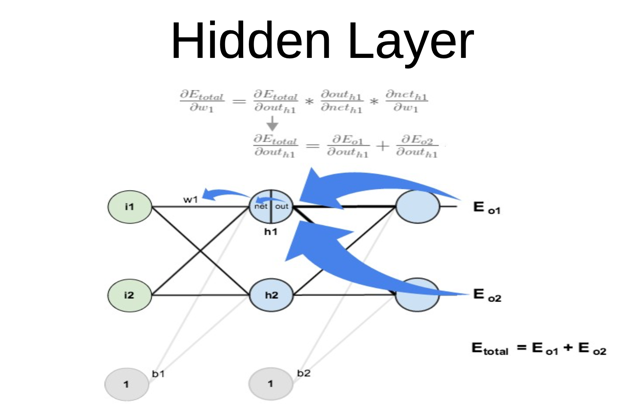

Source: DeepLearningIASD.pdf Tristan Cazenave PSL Dauphine


In [527]:
red_png(r'./png/NN_HiddenLayer.png', factor=.4)

How much a change in w1 affects the total error ?

$E_{total} = E_{o1} + E_{o2} \Rightarrow \frac{\partial E_{total}}{\partial w_{1}} = \frac{\partial E_{o1}}{\partial w_{1}} + \frac{\partial E_{o2}}{\partial w_{1}}$

We went back in time. We split the partial derivative $ \frac{\partial E_{total}}{\partial w_1} $ in a product of partial derivatives from back to the beginning (backward).  

By applying the chain rule we have:

$ \frac{\partial E_{o1}}{\partial w_{1}} =  \frac{\partial E_{o1}}{\partial out_{o1}} * \frac{\partial out_{o1}}{\partial net_{o1}} * \frac{\partial net_{o1}}{\partial out_{h1}} * \frac{\partial out_{h1}}{\partial net_{h1}} * \frac{\partial net_{h1}}{\partial w_{1}}$  

  
$ \frac{\partial E_{o2}}{\partial w_{1}} =  \frac{\partial E_{o2}}{\partial out_{o1}} * \frac{\partial out_{o2}}{\partial net_{o2}} * \frac{\partial net_{o2}}{\partial out_{h1}} * \frac{\partial out_{h1}}{\partial net_{h1}} * \frac{\partial net_{h1}}{\partial w_{1}}$

We have already demonstrated that: 

- $ \frac{\partial E_{01}}{\partial out_{o1}} = -(target_{o1} - out_{o1})$  

- $ \frac{\partial out_{o1}}{\partial net_{o1}} = (1 - out_{o1}) .out_{o1} $  

- $ \frac{\partial net_{o1}}{\partial out_{h1}} = w_5 $  

- $ \frac{\partial out_{h1}}{\partial net_{h1}} = (1 - out_{h1}).out_{h1} $

- $ \frac{\partial net_{h1}}{\partial w_{1}} = i_1 $

and:

- $ \frac{\partial E_{02}}{\partial out_{o2}} = -(target_{o2} - out_{o2})$  

- $ \frac{\partial out_{o2}}{\partial net_{o2}} = (1 - out_{o2}) .out_{o2} $  

- $ \frac{\partial net_{o2}}{\partial out_{h1}} = w_7 $  

- $ \frac{\partial out_{h1}}{\partial net_{h1}} = (1 - out_{h1}).out_{h1} $

- $ \frac{\partial net_{h1}}{\partial w_{1}} = i_1 $

Putting it all together:

$ \frac{\partial E_{o1}}{\partial w_{1}} =  \frac{\partial E_{o1}}{\partial out_{o1}} * \frac{\partial out_{o1}}{\partial net_{o1}} * \frac{\partial net_{o1}}{\partial out_{h1}} * \frac{\partial out_{h1}}{\partial net_{h1}} * \frac{\partial net_{h1}}{\partial w_{1}} = -(target_{o1} - out_{o1}) * (1 - out_{o1}) .out_{o1} * w_5 * (1 - out_{h1}).out_{h1} * i_1 $  

$ \frac{\partial E_{o2}}{\partial w_{1}} =  \frac{\partial E_{o2}}{\partial out_{o1}} * \frac{\partial out_{o2}}{\partial net_{o2}} * \frac{\partial net_{o2}}{\partial out_{h1}} * \frac{\partial out_{h1}}{\partial net_{h1}} * \frac{\partial net_{h1}}{\partial w_{1}} = -(target_{o2} - out_{o2}) * (1 - out_{o2}) .out_{o2} * w_7 * (1 - out_{h1}).out_{h1} * i_1 $  

In [528]:
grad_w1 = -(target_o1-out_o1)*(1-out_o1)*out_o1*w5*(1-out_h1)*out_h1*i1 -(target_o2-out_o2)*(1-out_o2)*out_o2*w7*(1-out_h1)*i1
grad_w1

0.00028100362016734396

In the same way, we have:

$ \frac{\partial E_{o1}}{\partial w_{2}} =  \frac{\partial E_{o1}}{\partial out_{o1}} * \frac{\partial out_{o1}}{\partial net_{o1}} * \frac{\partial net_{o1}}{\partial out_{h1}} * \frac{\partial out_{h1}}{\partial net_{h1}} * \frac{\partial net_{h1}}{\partial w_{2}} = -(target_{o1} - out_{o1}) * (1 - out_{o1}) .out_{o1} * w_5 * (1 - out_{h1}).out_{h1} * i_2 $  

  
$ \frac{\partial E_{o2}}{\partial w_{2}} =  \frac{\partial E_{o2}}{\partial out_{o2}} * \frac{\partial out_{o2}}{\partial net_{o2}} * \frac{\partial net_{o2}}{\partial out_{h1}} * \frac{\partial out_{h1}}{\partial net_{h1}} * \frac{\partial net_{h1}}{\partial w_{2}} = -(target_{o2} - out_{o2}) * (1 - out_{o2}) .out_{o2} * w_7 * (1 - out_{h1}).out_{h1} * i_2 $

In [529]:
grad_w2 = -(target_o1-out_o1)*(1-out_o1)*out_o1*w5*(1-out_h1)*out_h1*i2 -(target_o2-out_o2)*(1-out_o2)*out_o2*w7*(1-out_h1)*i2
grad_w2

0.0005620072403346879

$ \frac{\partial E_{o1}}{\partial w_{3}} =  \frac{\partial E_{o1}}{\partial out_{o1}} * \frac{\partial out_{o1}}{\partial net_{o1}} * \frac{\partial net_{o1}}{\partial out_{h2}} * \frac{\partial out_{h2}}{\partial net_{h2}} * \frac{\partial net_{h2}}{\partial w_{3}} = -(target_{o1} - out_{o1}) * (1 - out_{o1}) .out_{o1} * w_6 * (1 - out_{h2}).out_{h2} * i_1 $  

  
$ \frac{\partial E_{o2}}{\partial w_{3}} =  \frac{\partial E_{o2}}{\partial out_{o2}} * \frac{\partial out_{o2}}{\partial net_{o2}} * \frac{\partial net_{o2}}{\partial out_{h2}} * \frac{\partial out_{h2}}{\partial net_{h2}} * \frac{\partial net_{h2}}{\partial w_{3}} = -(target_{o2} - out_{o2}) * (1 - out_{o2}) .out_{o2} * w_8 * (1 - out_{h2}).out_{h2} * i_1 $

In [530]:
grad_w3 = -(target_o1-out_o1)*(1-out_o1)*out_o1*w6*(1-out_h2)*out_h2*i1 - (target_o2-out_o2)*(1-out_o2)*out_o2*w8*(1-out_h2)*i1
grad_w3

0.0003274589311789473

$ \frac{\partial E_{o1}}{\partial w_{4}} =  \frac{\partial E_{o1}}{\partial out_{o1}} * \frac{\partial out_{o1}}{\partial net_{o1}} * \frac{\partial net_{o1}}{\partial out_{h2}} * \frac{\partial out_{h2}}{\partial net_{h2}} * \frac{\partial net_{h2}}{\partial w_{4}} = -(target_{o1} - out_{o1}) * (1 - out_{o1}) .out_{o1} * w_6 * (1 - out_{h2}).out_{h2} * i_2 $  

  
$ \frac{\partial E_{o2}}{\partial w_{4}} =  \frac{\partial E_{o2}}{\partial out_{o2}} * \frac{\partial out_{o2}}{\partial net_{o2}} * \frac{\partial net_{o2}}{\partial out_{h2}} * \frac{\partial out_{h2}}{\partial net_{h2}} * \frac{\partial net_{h2}}{\partial w_{4}} = -(target_{o2} - out_{o2}) * (1 - out_{o2}) .out_{o2} * w_8 * (1 - out_{h2}).out_{h2} * i_2 $

In [531]:
grad_w4 = -(target_o1-out_o1)*(1-out_o1)*out_o1*w6*(1-out_h2)*out_h2*i2 - (target_o2-out_o2)*(1-out_o2)*out_o2*w8*(1-out_h2)*out_h2*i2
grad_w4

0.00099542547052172

In practice, we derive the $E_i$ by the $out_{oi}$ and after we find the direction to come back to the $w_i$ that we are looking for.

In [532]:
# Erreur totale
err_tot = err_o1 + err_o2
err_tot

0.2983711087600027

In [533]:
for i in range(10000):
    grad_w1 = -(target_o1-out_o1)*(1-out_o1)*out_o1*w5*(1-out_h1)*out_h1*i1 -(target_o2-out_o2)*(1-out_o2)*out_o2*w7*(1-out_h1)*i1
    w1 = w1 - lr * grad_w1
    
    grad_w2 = -(target_o1-out_o1)*(1-out_o1)*out_o1*w5*(1-out_h1)*out_h1*i2 -(target_o2-out_o2)*(1-out_o2)*out_o2*w7*(1-out_h1)*i2
    w2 = w2 - lr * grad_w2

    grad_w3 = -(target_o1-out_o1)*(1-out_o1)*out_o1*w6*(1-out_h2)*out_h2*i1 - (target_o2-out_o2)*(1-out_o2)*out_o2*w8*(1-out_h2)*i1
    w3 = w3 - lr * grad_w3

    grad_w4 = -(target_o1-out_o1)*(1-out_o1)*out_o1*w6*(1-out_h2)*out_h2*i2 - (target_o2-out_o2)*(1-out_o2)*out_o2*w8*(1-out_h2)*out_h2*i2
    w4 = w4 - lr * grad_w4

    grad_w5 = -(target_o1-out_o1)*(1-out_o1)*out_o1*out_h1
    w5 = w5 - lr * grad_w5
    
    grad_w6 = -(target_o1-out_o1)*(1-out_o1)*out_o1*out_h2
    w6 = w6 - lr * grad_w6
    
    grad_w7 = -(target_o2 - out_o2)*(1-out_o2)*out_o2*out_h1
    w7 = w7 - lr * grad_w7
    
    grad_w8 = -(target_o2 - out_o2) * (1 - out_o2) * out_o2 * out_h2
    w8 = w8 - lr * grad_w8

In [534]:
print(' w1:',round(w1,9),'\n','w2:',round(w2,9),'\n','w3:',round(w3,9),'\n','w4:',round(w4,9),'\n',
      'w5:',round(w5,9),'\n','w6:',round(w6,9),'\n','w7:',round(w7,9),'\n','w8:',round(w8,9),'\n')

 w1: 1933.706620176 
 w2: 3867.313240352 
 w3: 1938.488166933 
 w4: 3699.108996655 
 w5: -410.435202821 
 w6: -412.888139238 
 w7: 113.512702387 
 w8: 114.25121108 



In [536]:
# Forward pass with sigmoid as activation fonction
net_h1, net_h2, out_h1, out_h2, net_o1, net_o2, out_o1, out_o2 = fwd_pass(i1,i2,w1,w2,w3,w4,w5,w6,w7,w8,b1,b2)

/var/folders/tb/_m1wm0vd633_w2zg_9vw_19m0000gn/T/ipykernel_8251/3424394030.py:4: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-x))


In [537]:
target_o1, out_o1

(0.01, 0.0)

In [538]:
target_o2, out_o2

(0.99, 1.0)

In [539]:
err_o1 = err_mse(out_o1, target_o1)
err_o1

5e-05

In [540]:
err_o2 = err_mse(out_o2, target_o2)
err_o2

5.000000000000009e-05

In [541]:
# Erreur totale
err_tot = err_o1 + err_o2
err_tot

0.0001000000000000001